0.0005980224039774949


<Figure size 640x480 with 0 Axes>

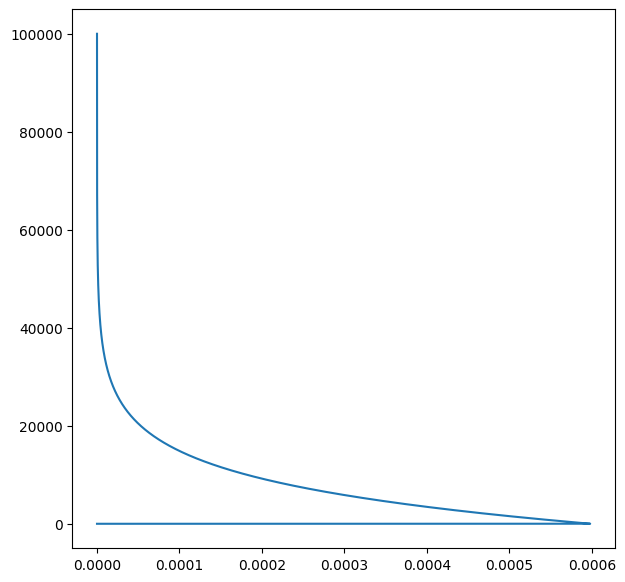

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(radius, rho0, v0, z, mass, theta):
    cd = 1
    A = np.pi * radius ** 2
    H = 8000
    z0 = 100000
    
    K = (cd * rho0 * A /(2 * mass *np.sin(theta))) 
    velocity = np.exp(-K*H*((np.exp(-z/H) - np.exp(-z0/H))) + np.log(v0))
    
    return velocity

alt_step = np.linspace(100000,0,10000)
radius = 35
rho0 = 1.2
planet_density = 3000
mass = 4/3 * np.pi * radius**3 * planet_density
theta = 45

velocity_array = np.array((analytical_solution(radius, rho0, 1e3, alt_step, mass, theta)))


kinetic_energy = (0.5/4.184e12)*(mass)*(velocity_array**2)
#print(kinetic_energy)
dedz = np.zeros(len(kinetic_energy))
for i in range(len(alt_step)-1):
    #dedz[i] = (kinetic_energy[i] - kinetic_energy[i+1])/((alt_step[i] - alt_step[i+1])/1000) # this will switch to km
    dedz[i] = (kinetic_energy[i] - kinetic_energy[i+1])/((alt_step[i] - alt_step[i+1])) # this will keep it in meters
    
#print(dedz[len(dedz)-2])
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(dedz, alt_step)
plt.show()

In [33]:
import solver
import matplotlib.pyplot as plt
planet = solver.Planet(g=0, Cl=0, Rp=float('inf'), Cd =1 )
result = planet.solve_atmospheric_entry(radius=35, angle=45,init_altitude=100000,
                                       strength=1e7, density=3000,
                                       velocity=1e3)
energy = planet.calculate_energy(result)

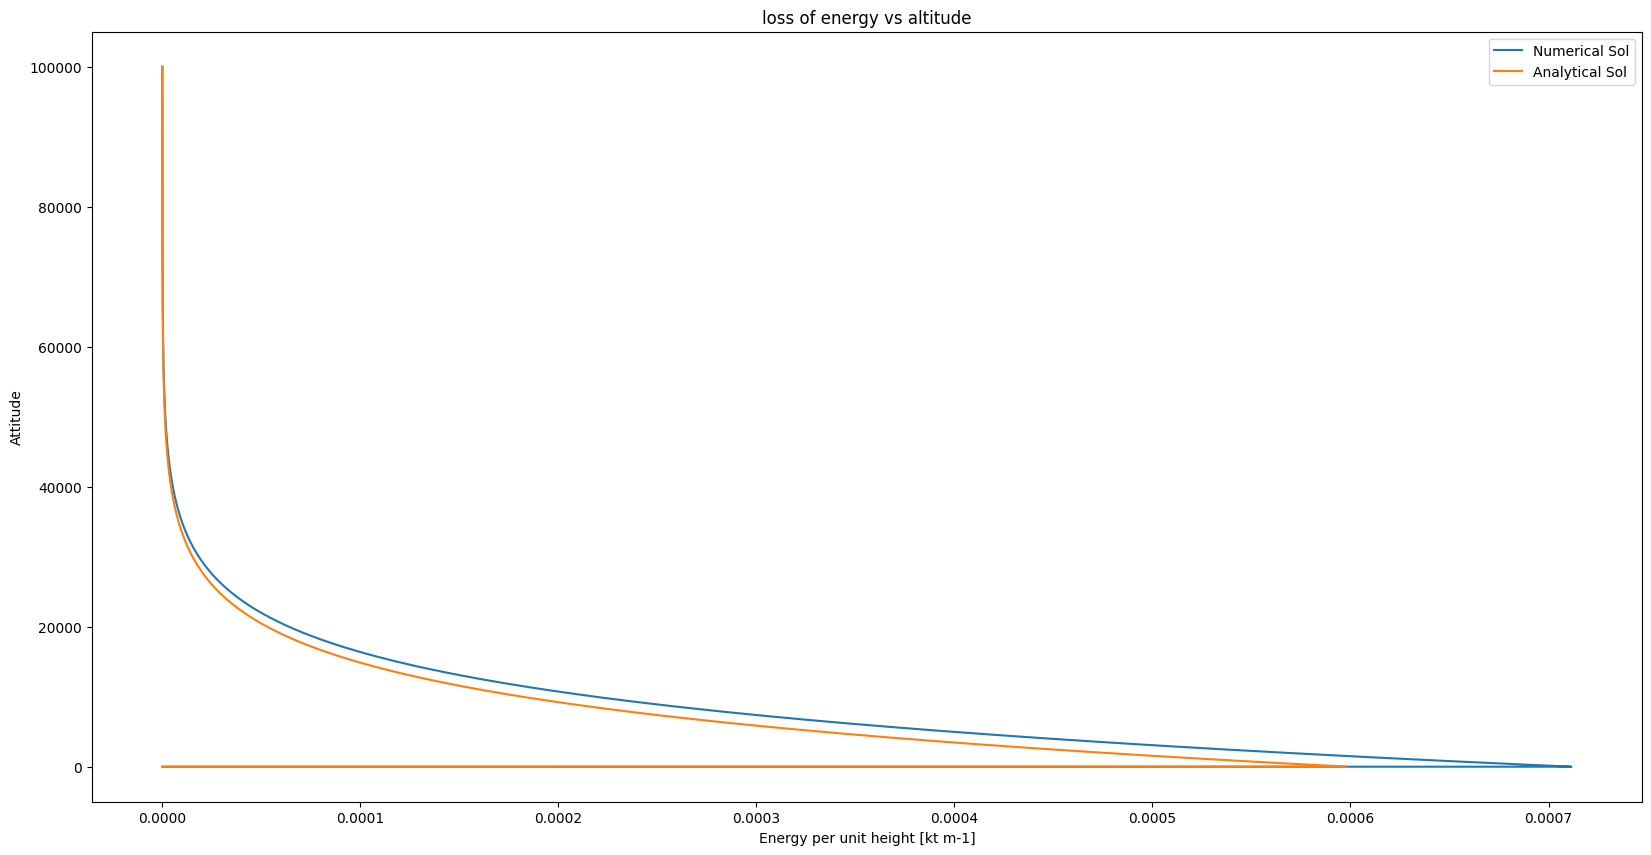

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
loss_energy = energy['dedz']
x = energy['altitude']

ax.plot(loss_energy, x, label = "Numerical Sol")
ax.plot(dedz, alt_step, label = "Analytical Sol")

ax.set_xlabel('Energy per unit height [kt m-1]')
ax.set_ylabel('Attitude')
ax.set_title('loss of energy vs altitude')
plt.legend(loc='upper right')
